<a href="https://colab.research.google.com/github/a84597216/billboard/blob/main/LIS_705_Billboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import requests
import io
import re

# Billboard.csv

In [ ]:
# billboard.csv
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-14/billboard.csv'
df_billboard = pd.read_csv(url)
df_billboard.head(5)

,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8


In [ ]:
# billboard.csv describe()
df_billboard.describe()

,week_position,instance,previous_week_position,peak_position,weeks_on_chart
count,327895.000000,327895.000000,295941.000000,327895.000000,327895.000000
mean,50.499309,1.072538,47.604066,41.358307,9.153793
std,28.865707,0.334188,28.056915,29.542497,7.590281
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.500000,1.000000,23.000000,14.000000,4.000000
50%,50.000000,1.000000,47.000000,39.000000,7.000000
75%,75.000000,1.000000,72.000000,66.000000,13.000000
max,100.000000,10.000000,100.000000,100.000000,87.000000


In [ ]:
# billboard.csv info()/ nunique()
df_billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     327895 non-null  object 
 1   week_id                 327895 non-null  object 
 2   week_position           327895 non-null  int64  
 3   song                    327895 non-null  object 
 4   performer               327895 non-null  object 
 5   song_id                 327895 non-null  object 
 6   instance                327895 non-null  int64  
 7   previous_week_position  295941 non-null  float64
 8   peak_position           327895 non-null  int64  
 9   weeks_on_chart          327895 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 25.0+ MB


In [ ]:
df_billboard.nunique()

url                        3279
week_id                    3279
week_position               100
song                      24360
performer                 10061
song_id                   29389
instance                     10
previous_week_position      100
peak_position               100
weeks_on_chart               87
dtype: int64

# audio_features.csv

In [ ]:
# audio_features.csv
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-14/audio_features.csv'
df_audio = pd.read_csv(url)
df_audio.head(5)

,song_id,performer,song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [ ]:
# audio_features.csv describe()
df_audio.describe()

,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
count,2.439700e+04,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24334.000000,24397.000000
mean,2.206843e+05,0.599945,0.618096,5.231651,-8.664607,0.727172,0.073554,0.294635,0.032539,0.192098,0.601746,120.276066,3.931577,41.224413
std,6.774671e+04,0.153133,0.199078,3.560211,3.601119,0.445422,0.083153,0.282300,0.136276,0.159073,0.238645,28.046937,0.320858,22.477405
min,2.968800e+04,0.000000,0.000581,0.000000,-28.030000,0.000000,0.000000,0.000003,0.000000,0.009670,0.000000,0.000000,0.000000,0.000000
25%,1.750530e+05,0.499000,0.476000,2.000000,-11.034000,0.000000,0.032100,0.046700,0.000000,0.090900,0.415000,99.060750,4.000000,23.000000
50%,2.148500e+05,0.608000,0.634000,5.000000,-8.205000,1.000000,0.041300,0.195000,0.000005,0.131000,0.622000,118.910500,4.000000,43.000000
75%,2.532530e+05,0.708000,0.778000,8.000000,-5.856250,1.000000,0.068300,0.508000,0.000460,0.248750,0.802000,136.483750,4.000000,59.000000
max,3.079157e+06,0.988000,0.997000,11.000000,2.291000,1.000000,0.951000,0.991000,0.982000,0.999000,0.991000,241.009000,5.000000,100.000000


In [ ]:
# audio_features.csv info()/ nunique()
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   song_id                    29503 non-null  object 
 1   performer                  29503 non-null  object 
 2   song                       29503 non-null  object 
 3   spotify_genre              27903 non-null  object 
 4   spotify_track_id           24397 non-null  object 
 5   spotify_track_preview_url  14491 non-null  object 
 6   spotify_track_duration_ms  24397 non-null  float64
 7   spotify_track_explicit     24397 non-null  object 
 8   spotify_track_album        24391 non-null  object 
 9   danceability               24334 non-null  float64
 10  energy                     24334 non-null  float64
 11  key                        24334 non-null  float64
 12  loudness                   24334 non-null  float64
 13  mode                       24334 non-null  flo

In [ ]:
df_audio.nunique()

song_id                      29386
performer                    10059
song                         24359
spotify_genre                 3375
spotify_track_id             24177
spotify_track_preview_url    14371
spotify_track_duration_ms    13984
spotify_track_explicit           2
spotify_track_album          13125
danceability                   837
energy                         985
key                             12
loudness                     11165
mode                             2
speechiness                   1230
acousticness                  3057
instrumentalness              4424
liveness                      1611
valence                       1103
tempo                        20485
time_signature                   5
spotify_track_popularity       101
dtype: int64

# data cleaning

## drop billboard

In [ ]:
# drop df_billboard
df_billboard = df_billboard.drop(columns=['url', 'instance'])
df_billboard['week_id'] = pd.to_datetime(df_billboard['week_id'])

In [ ]:
df_billboard.head()

,week_id,week_position,song,performer,song_id,previous_week_position,peak_position,weeks_on_chart
0,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,45.0,34,4
1,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,34.0,22,5
2,1965-07-31,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,22.0,14,6
3,1965-08-07,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,14.0,10,7
4,1965-08-14,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,10.0,8,8


In [ ]:
df_billboard.count()

week_id                   327895
week_position             327895
song                      327895
performer                 327895
song_id                   327895
previous_week_position    295941
peak_position             327895
weeks_on_chart            327895
dtype: int64

In [ ]:
#df_billboard.sort_values(by=['week_id'], ascending=True)
#df_billboard.min()

## for top 100 

In [ ]:
# create a new df_billboard that drop same song_id keep highest 'weeks on chart'

In [ ]:
df_billboard_weekonchart = df_billboard.sort_values(by=['week_id'], ascending=False)
df_billboard_weekonchart.head()

,week_id,week_position,song,performer,song_id,previous_week_position,peak_position,weeks_on_chart
100794,2021-05-29,26,Beautiful Mistakes,Maroon 5 Featuring Megan Thee Stallion,Beautiful MistakesMaroon 5 Featuring Megan The...,18.0,18,11
240638,2021-05-29,4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door OpenSilk Sonic (Bruno Mars & An...,1.0,1,11
7701,2021-05-29,28,hunger.on.hillside,J. Cole & Bas,hunger.on.hillsideJ. Cole & Bas,NaN,28,1
97177,2021-05-29,57,Settling Down,Miranda Lambert,Settling DownMiranda Lambert,49.0,49,10
245950,2021-05-29,3,Levitating,Dua Lipa Featuring DaBaby,LevitatingDua Lipa Featuring DaBaby,2.0,2,33


In [ ]:
df_billboard_weekonchart = df_billboard_weekonchart.drop_duplicates(subset=['song_id'], keep='first')
df_billboard_weekonchart = df_billboard_weekonchart.drop(columns=['week_position','previous_week_position','peak_position'])
df_billboard_weekonchart.count()

week_id           29389
song              29389
performer         29389
song_id           29389
weeks_on_chart    29389
dtype: int64

## drop audio

In [ ]:
# drop df_audio columns
df_audio = df_audio.drop(columns=['spotify_track_id', 'spotify_track_preview_url', 'spotify_track_album', 'spotify_track_popularity'])

In [ ]:
# drop duplicate
df_audio = df_audio.drop_duplicates(subset=['song_id'], keep='last')

In [ ]:
# verify data count was 29503
df_audio.count()

song_id                      29386
performer                    29386
song                         29386
spotify_genre                27791
spotify_track_duration_ms    24288
spotify_track_explicit       24288
danceability                 24225
energy                       24225
key                          24225
loudness                     24225
mode                         24225
speechiness                  24225
acousticness                 24225
instrumentalness             24225
liveness                     24225
valence                      24225
tempo                        24225
time_signature               24225
dtype: int64

In [ ]:
df_audio[df_audio['spotify_genre'].isna()]

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
22,"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",Duane Eddy His Twangy Guitar And The Rebels,"""Yep!""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,(All I Have To Do Is) DreamThe Nitty Gritty Di...,The Nitty Gritty Dirt Band,(All I Have To Do Is) Dream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,(Down At) Papa Joe'sThe Dixiebelles,The Dixiebelles,(Down At) Papa Joe's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,(I Believe) There's Nothing Stronger Than Our ...,Paul Anka/Odia Coates,(I Believe) There's Nothing Stronger Than Our ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,(I Know) I'm Losing YouRod Stewart With Faces,Rod Stewart With Faces,(I Know) I'm Losing You,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29409,Your Cash Ain't Nothin' But TrashThe Steve Mil...,The Steve Miller Band,Your Cash Ain't Nothin' But Trash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29410,Your Cheatin' HeartBilly Vaughn And His Orchestra,Billy Vaughn And His Orchestra,Your Cheatin' Heart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29424,Your Love Is A...Whitehead Bros.,Whitehead Bros.,Your Love Is A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29463,"Your Time Hasn't Come Yet, BabyElvis Presley W...",Elvis Presley With The Jordanaires,"Your Time Hasn't Come Yet, Baby",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# take not null data from audio
df_audio_c = df_audio[df_audio['key'].notna()]
df_audio_c = df_audio_c[df_audio_c['spotify_genre'].notna()]
df_audio_c.count()

song_id                      24082
performer                    24082
song                         24082
spotify_genre                24082
spotify_track_duration_ms    24078
spotify_track_explicit       24078
danceability                 24082
energy                       24082
key                          24082
loudness                     24082
mode                         24082
speechiness                  24082
acousticness                 24082
instrumentalness             24082
liveness                     24082
valence                      24082
tempo                        24082
time_signature               24082
dtype: int64

In [ ]:
# verify null data is not in df_audio_c
df_audio_c[df_audio_c['spotify_genre'].isna()]

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


## merge billboard and audio

In [ ]:
# inner : return dataframe that are common from billboard and audio
df_cd = pd.merge(df_billboard, df_audio_c, how = 'inner')#, on = ['song_id','song','performer'])
df_cd.count()

week_id                      282371
week_position                282371
song                         282371
performer                    282371
song_id                      282371
previous_week_position       256097
peak_position                282371
weeks_on_chart               282371
spotify_genre                282371
spotify_track_duration_ms    282337
spotify_track_explicit       282337
danceability                 282371
energy                       282371
key                          282371
loudness                     282371
mode                         282371
speechiness                  282371
acousticness                 282371
instrumentalness             282371
liveness                     282371
valence                      282371
tempo                        282371
time_signature               282371
dtype: int64

In [ ]:
#df_cd.describe().to_csv("df_cd_description.csv")
df_cd.describe()

,week_position,previous_week_position,peak_position,weeks_on_chart,spotify_track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,282371.000000,256097.000000,282371.000000,282371.000000,2.823370e+05,282371.000000,282371.000000,282371.000000,282371.000000,282371.000000,282371.000000,282371.000000,282371.000000,282371.000000,282371.000000,282371.000000,282371.000000
mean,49.585003,46.773793,40.288390,9.395278,2.289194e+05,0.613126,0.631568,5.256967,-8.360762,0.716851,0.071294,0.260204,0.027810,0.185204,0.600602,120.054959,3.947286
std,28.773858,27.913163,29.255127,7.694545,6.485127e+04,0.150125,0.194022,3.563988,3.554488,0.450529,0.077982,0.265714,0.124345,0.153759,0.235644,27.757304,0.285427
min,1.000000,1.000000,1.000000,1.000000,2.968800e+04,0.000000,0.000581,0.000000,-28.030000,0.000000,0.000000,0.000003,0.000000,0.009670,0.000000,0.000000,0.000000
25%,25.000000,22.000000,13.000000,4.000000,1.890530e+05,0.516000,0.494000,2.000000,-10.698000,0.000000,0.032100,0.038300,0.000000,0.088200,0.419000,99.048000,4.000000
50%,49.000000,46.000000,37.000000,8.000000,2.246400e+05,0.621000,0.649000,5.000000,-7.787000,1.000000,0.041300,0.158000,0.000004,0.126000,0.619000,118.552000,4.000000
75%,74.000000,70.000000,65.000000,13.000000,2.593060e+05,0.720000,0.787000,8.000000,-5.603000,1.000000,0.067000,0.428000,0.000369,0.240000,0.796000,135.959000,4.000000
max,100.000000,100.000000,100.000000,87.000000,3.079157e+06,0.988000,0.997000,11.000000,2.291000,1.000000,0.924000,0.991000,0.982000,0.999000,0.991000,241.009000,5.000000


In [ ]:
# Returns the most frequently occurring value for each column
# df_cd.mode().to_csv("df_cd_mode.csv")
#df_cd.mode()
df_cd.info()
#df_cd.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282371 entries, 0 to 282370
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   week_id                    282371 non-null  datetime64[ns]
 1   week_position              282371 non-null  int64         
 2   song                       282371 non-null  object        
 3   performer                  282371 non-null  object        
 4   song_id                    282371 non-null  object        
 5   previous_week_position     256097 non-null  float64       
 6   peak_position              282371 non-null  int64         
 7   weeks_on_chart             282371 non-null  int64         
 8   spotify_genre              282371 non-null  object        
 9   spotify_track_duration_ms  282337 non-null  float64       
 10  spotify_track_explicit     282337 non-null  object        
 11  danceability               282371 non-null  float64 

In [ ]:
df_cd.loc[(df_cd['performer'] == 'Augie Rios')]

,week_id,week_position,song,performer,song_id,previous_week_position,peak_position,weeks_on_chart,spotify_genre,spotify_track_duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [ ]:
df_cd.loc[(df_cd['song_id'] == 'TapNAV Featuring Meek Mill')]

,week_id,week_position,song,performer,song_id,previous_week_position,peak_position,weeks_on_chart,spotify_genre,spotify_track_duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
108601,2019-04-06,89,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,NaN,89,1,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108602,2019-06-29,95,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,NaN,95,2,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108603,2019-07-06,95,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,95.0,95,3,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108604,2019-07-13,99,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,95.0,95,4,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108605,2019-07-20,96,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,99.0,95,5,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108606,2019-07-27,93,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,96.0,93,6,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108607,2019-08-03,87,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,93.0,87,7,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108608,2019-08-10,90,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,87.0,87,8,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108609,2019-08-17,92,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,90.0,87,9,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0
108610,2019-08-24,97,Tap,NAV Featuring Meek Mill,TapNAV Featuring Meek Mill,92.0,87,10,"['canadian hip hop', 'melodic rap', 'pop rap',...",148278.0,...,2.0,-7.033,1.0,0.251,0.0646,0.0,0.0863,0.452,85.018,4.0


In [ ]:
# df_cd['song'].value_counts().to_frame().head(5)
# df_cd['performer'].value_counts().to_frame().head(5)
df_cd['song_id'].value_counts().to_frame().head(5)
# df_cd.loc[df_cd['song'] == 'Angel']

,song_id
RadioactiveImagine Dragons,87
SailAWOLNATION,79
Blinding LightsThe Weeknd,76
I'm YoursJason Mraz,76
How Do I LiveLeAnn Rimes,69


In [ ]:
# find certain time's values
df_cd[(df_cd.week_id >= '2018-01-01') & (df_cd.week_id <= '2018-01-10')].head()

,week_id,week_position,song,performer,song_id,previous_week_position,peak_position,weeks_on_chart,spotify_genre,spotify_track_duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2064,2018-01-06,39,Attention,Charlie Puth,AttentionCharlie Puth,44.0,5,35,"['dance pop', 'pop', 'post-teen pop', 'viral p...",208786.0,...,3.0,-4.586,0.0,0.0542,0.1090,0.000023,0.1340,0.797,100.066,4.0
2250,2018-01-06,20,Sorry Not Sorry,Demi Lovato,Sorry Not SorryDemi Lovato,21.0,6,24,"['dance pop', 'pop', 'post-teen pop']",203760.0,...,11.0,-6.928,0.0,0.2250,0.0237,0.000000,0.2620,0.887,144.077,4.0
2269,2018-01-06,70,Codeine Dreaming,Kodak Black Featuring Lil Wayne,Codeine DreamingKodak Black Featuring Lil Wayne,64.0,52,4,"['florida rap', 'hip hop', 'melodic rap', 'mia...",264531.0,...,1.0,-7.357,0.0,0.2220,0.0652,0.000064,0.1240,0.574,155.007,4.0
3015,2018-01-06,51,Roll In Peace,Kodak Black Featuring XXXTENTACION,Roll In PeaceKodak Black Featuring XXXTENTACION,51.0,51,18,"['florida rap', 'hip hop', 'melodic rap', 'mia...",213132.0,...,10.0,-6.807,0.0,0.2450,0.0306,0.000000,0.2000,0.363,140.053,4.0
6775,2018-01-06,19,Shape Of You,Ed Sheeran,Shape Of YouEd Sheeran,24.0,1,50,"['pop', 'uk pop']",233712.0,...,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,4.0


In [ ]:
# verify no null data
df_cd[df_cd['spotify_genre'].isna()]

,week_id,week_position,song,performer,song_id,previous_week_position,peak_position,weeks_on_chart,spotify_genre,spotify_track_duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [ ]:
df_cd.dtypes

week_id                      datetime64[ns]
week_position                         int64
song                                 object
performer                            object
song_id                              object
previous_week_position              float64
peak_position                         int64
weeks_on_chart                        int64
spotify_genre                        object
spotify_track_duration_ms           float64
spotify_track_explicit               object
danceability                        float64
energy                              float64
key                                 float64
loudness                            float64
mode                                float64
speechiness                         float64
acousticness                        float64
instrumentalness                    float64
liveness                            float64
valence                             float64
tempo                               float64
time_signature                  

In [ ]:
df_cd.shape

(282371, 23)

In [ ]:
df_cd.max()

week_id                                                    2021-05-29 00:00:00
week_position                                                              100
song                                                                  whoknows
performer                    will.i.am Featuring Miley Cyrus, French Montan...
song_id                                                          whoknowsMusiq
previous_week_position                                                   100.0
peak_position                                                              100
weeks_on_chart                                                              87
spotify_genre                                                               []
spotify_track_duration_ms                                            3079157.0
spotify_track_explicit                                                    True
danceability                                                             0.988
energy                                              

### delete same songid keep highest songs on chart

In [ ]:
# new merge 
df_mr = pd.merge(df_billboard_weekonchart, df_audio, how = 'inner')
df_mr.count()

week_id                      29368
song                         29368
performer                    29368
song_id                      29368
weeks_on_chart               29368
spotify_genre                27773
spotify_track_duration_ms    24283
spotify_track_explicit       24283
danceability                 24221
energy                       24221
key                          24221
loudness                     24221
mode                         24221
speechiness                  24221
acousticness                 24221
instrumentalness             24221
liveness                     24221
valence                      24221
tempo                        24221
time_signature               24221
dtype: int64

In [ ]:
# check most popular song, df_cd['song_id'].value_counts().to_frame().head(5)
df_mr.sort_values(by=['weeks_on_chart'], ascending=False).head(5)

,week_id,song,performer,song_id,weeks_on_chart,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3664,2014-05-10,Radioactive,Imagine Dragons,RadioactiveImagine Dragons,87,['modern rock'],186813.0,False,0.448,0.784,9.0,-3.686,1.0,0.0627,0.10600,0.000108,0.6680,0.236,136.245,4.0
3709,2014-03-22,Sail,AWOLNATION,SailAWOLNATION,79,"['indie pop', 'la indie', 'modern alternative ...",259102.0,False,0.825,0.435,1.0,-9.582,1.0,0.0568,0.45200,0.609000,0.0953,0.243,119.038,4.0
5618,2009-10-10,I'm Yours,Jason Mraz,I'm YoursJason Mraz,76,"['acoustic pop', 'neo mellow', 'pop', 'pop rock']",242186.0,False,0.686,0.457,11.0,-8.322,1.0,0.0468,0.59500,0.000000,0.1050,0.718,150.953,4.0
24,2021-05-29,Blinding Lights,The Weeknd,Blinding LightsThe Weeknd,76,"['canadian contemporary r&b', 'canadian pop', ...",201573.0,False,0.513,0.796,1.0,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,4.0
9318,1998-10-10,How Do I Live,LeAnn Rimes,How Do I LiveLeAnn Rimes,69,"['country', 'country dawn', 'dance pop', 'pop ...",266973.0,False,0.577,0.462,2.0,-7.989,1.0,0.0279,0.12800,0.000000,0.0822,0.258,128.303,4.0


In [ ]:
# find null data
df_mr[df_mr['spotify_genre'].isna()]

,week_id,song,performer,song_id,weeks_on_chart,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2021-05-29,Beautiful Mistakes,Maroon 5 Featuring Megan Thee Stallion,Beautiful MistakesMaroon 5 Featuring Megan The...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-05-29,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door OpenSilk Sonic (Bruno Mars & An...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-05-29,hunger.on.hillside,J. Cole & Bas,hunger.on.hillsideJ. Cole & Bas,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-05-29,Levitating,Dua Lipa Featuring DaBaby,LevitatingDua Lipa Featuring DaBaby,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-05-29,Crocodile Teeth,Nicki Minaj & Skillibeng,Crocodile TeethNicki Minaj & Skillibeng,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29308,1958-08-30,Don't Ask Me Why,Elvis Presley With The Jordanaires,Don't Ask Me WhyElvis Presley With The Jordana...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29313,1958-08-23,Straighten Up & Fly Right,DeJohn Sisters,Straighten Up & Fly RightDeJohn Sisters,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29334,1958-08-09,Come In Stranger,Johnny Cash And The Tennessee Two,Come In StrangerJohnny Cash And The Tennessee Two,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29359,1958-08-02,Got A Match?,Frank Gallup,Got A Match?Frank Gallup,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# verify no duplicate rows
# df_mr.loc[(df_mr['song_id'] == 'Dancing With A StrangerSam Smith & Normani')]
# df2 = df_mr[df_mr.song_id.duplicated(keep=False)]
# df2

# append genre into one array

In [ ]:
df_cd['spotify_genre'].count()

282371

In [ ]:
df_cd['spotify_genre'][50]

"['adult standards', 'country rock', 'folk', 'folk rock', 'heartland rock', 'lilith', 'mellow gold', 'singer-songwriter', 'soft rock']"

In [ ]:
# extract the words from the series
genre=[]
for elem in df_cd['spotify_genre']:
  genre.extend(elem.split(", "))

print(genre[10:15])

["['deep adult standards']", "['brill building pop'", "'classic rock'", "'classic soul'", "'folk rock'"]


In [ ]:
genre = [word.strip("[]',") for word in genre]

In [ ]:
genre[50]

'southern soul'

In [ ]:
# genre[150:159]

# create word cloud/ barchart by genre

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Word Cloud

(-0.5, 999.5, 499.5, -0.5)

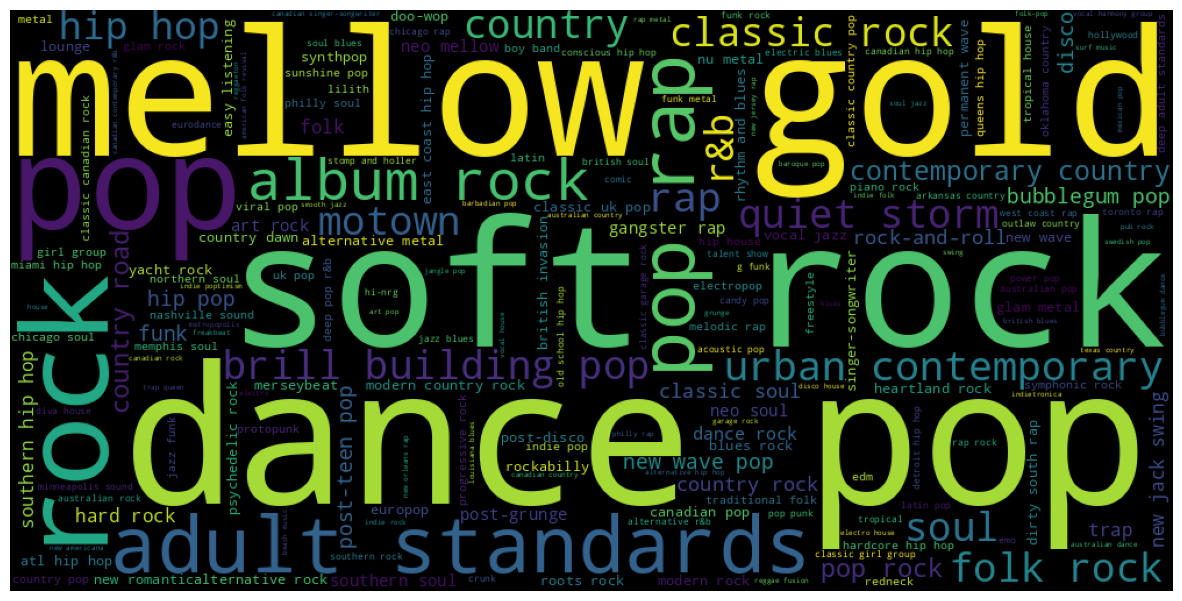

In [ ]:
#convert it to dictionary with values and its occurences
word_cloud_dict=Counter(genre)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
# plt.show()

## Barchart

In [ ]:
# create bar plot
word_cloud_dict_10 = word_cloud_dict.most_common(10)

In [ ]:
len(word_cloud_dict.keys())

1043

In [ ]:
word_cloud_dict_10

[('dance pop', 45792),
 ('mellow gold', 44645),
 ('soft rock', 44072),
 ('pop', 43709),
 ('rock', 37299),
 ('adult standards', 32325),
 ('pop rap', 31576),
 ('album rock', 28015),
 ('urban contemporary', 26548),
 ('rap', 25979)]

In [ ]:
word_keys = []
word_values = []
for item in word_cloud_dict_10:
    word_keys.append(item[0])
    word_values.append(item[1])

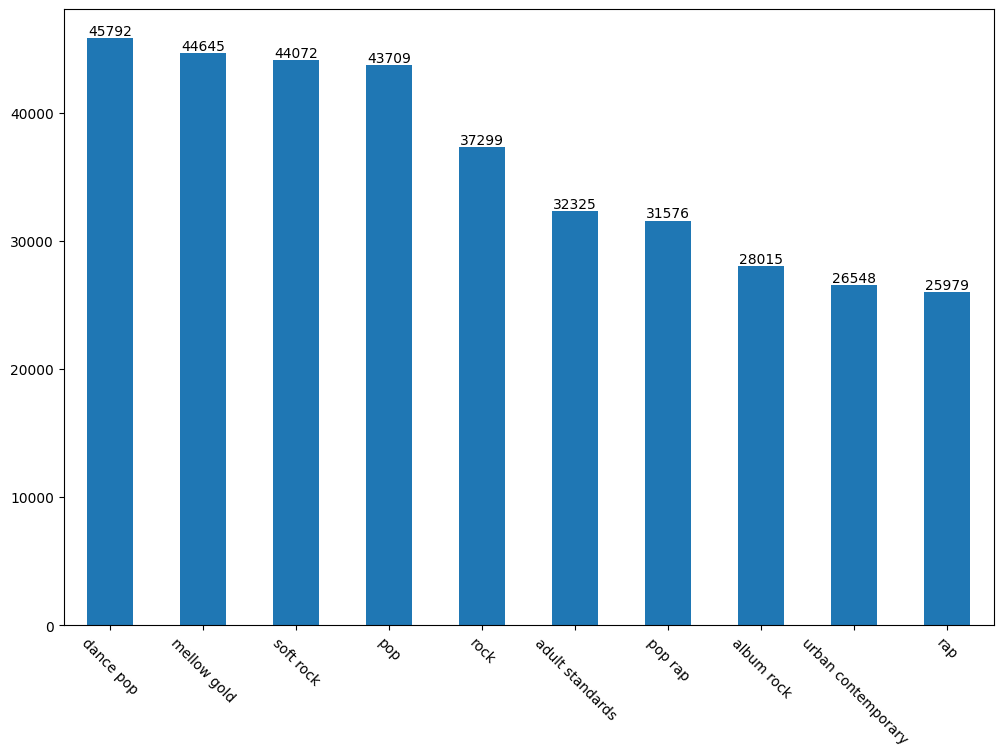

In [ ]:
# Plot the figure.
plt.figure(figsize=(12, 8))
fig = pd.Series(word_values).plot(kind='bar')
fig.set_xticklabels(word_keys)
fig.bar_label(fig.containers[0], label_type='edge')
plt.xticks(rotation = -45)
plt.show()

# Multiple Linear Regression

## Heatmap

In [ ]:
# from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
# from factor_analyzer import FactorAnalyzer
import seaborn as sns

In [ ]:
prs = df_mr.sort_values(by=['weeks_on_chart'], ascending=False).dropna(subset=['liveness','spotify_track_duration_ms', 'spotify_genre']).head(100)
prs = prs.drop(columns=['week_id','song','performer','song_id','spotify_genre','spotify_track_explicit','key','mode','time_signature'])

In [ ]:
# prs.head()

In [ ]:
# std_score_df = (prs - prs.mean()) / prs.std()
# # 計算皮爾森相關係數 Pearson correlation coefficient
# corr_score_df = std_score_df.corr()

In [ ]:
from scipy.stats import pearsonr

# 計算每對列之間的 Pearson 相關係數和相應的 p 值
corr_matrix, p_matrix = pd.DataFrame(), pd.DataFrame()
for i, col1 in enumerate(prs.columns):
    for j, col2 in enumerate(prs.columns):
        corr, p = pearsonr(prs[col1], prs[col2])
        corr_matrix.loc[col1, col2] = corr
        p_matrix.loc[col1, col2] = p

In [ ]:
corr, p_value = pearsonr(prs['energy'], prs['energy'])
p_value

0.0

<Axes: >

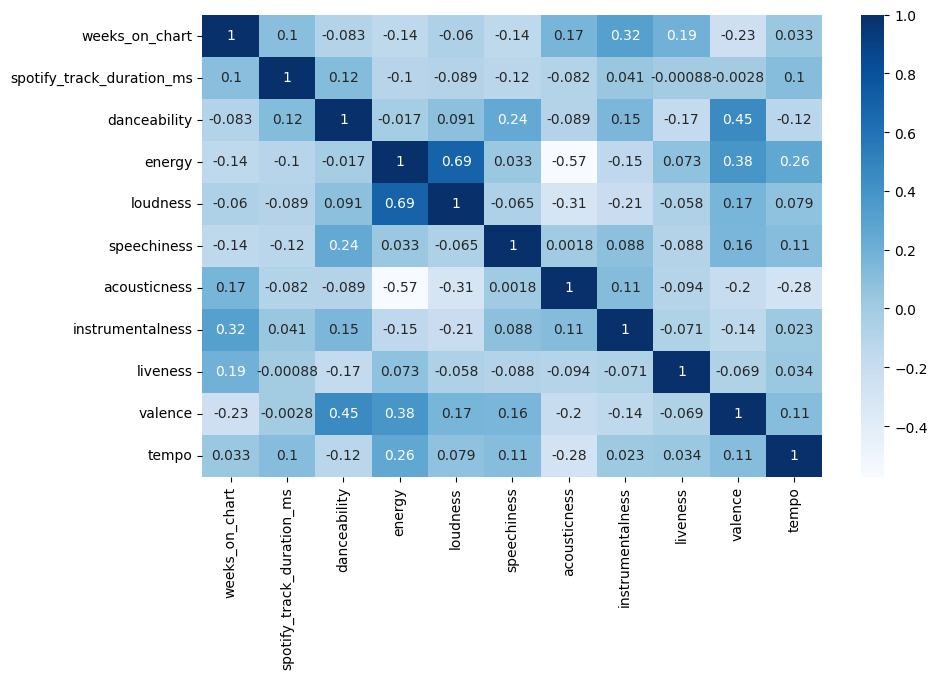

In [ ]:
# 設定熱圖大小
plt.figure(figsize=(10, 6))
# Pearson 相關係數
sns.heatmap(corr_matrix, cmap='Blues', annot=True)

<Axes: >

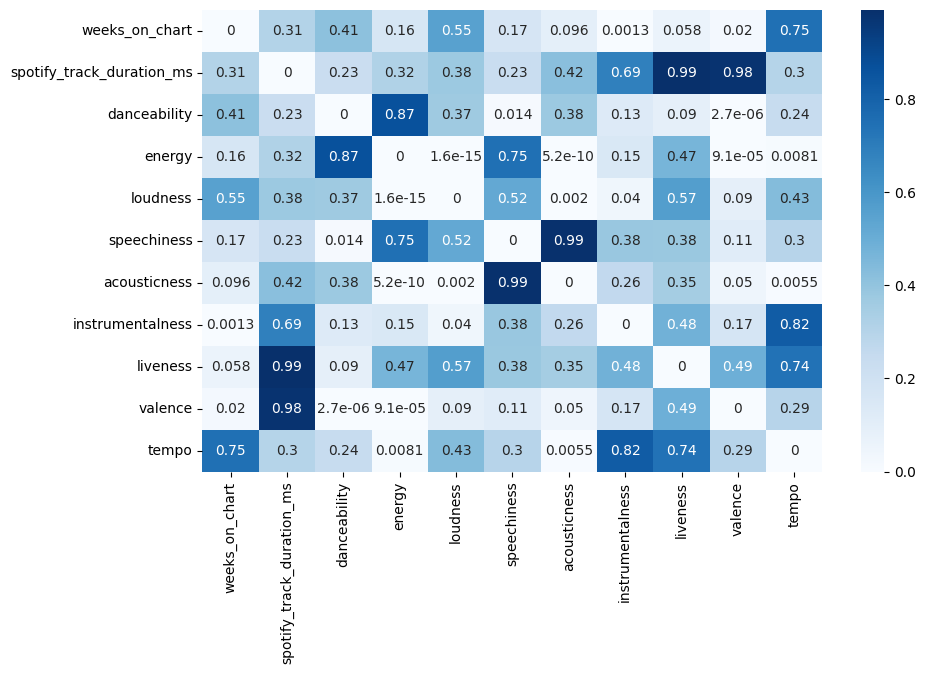

In [ ]:
# 設定熱圖大小
plt.figure(figsize=(10, 6))
# 相應的 p 值
sns.heatmap(p_matrix, cmap='Blues', annot=True)

In [ ]:
# # 設定熱圖大小
# plt.figure(figsize=(10, 6))
# # 從熱圖明細看出變量間具有相關性
# sns.heatmap(corr_score_df, cmap='Blues', annot=True)

## Boxplot(outlier)

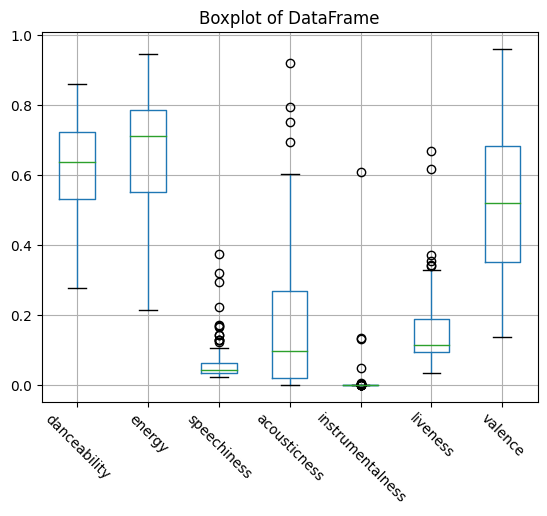

In [ ]:
# create a boxplot from the dataframe
box = df_mr.sort_values(by=['weeks_on_chart'], ascending=False).dropna(subset=['liveness','spotify_track_duration_ms', 'spotify_genre']).head(100)
box = box.drop(columns=['week_id','song','performer','song_id','spotify_genre','spotify_track_explicit','key','mode','time_signature'])
box = box.drop(columns=['spotify_track_duration_ms','tempo','weeks_on_chart','loudness'])

# plt.boxplot(box['spotify_track_duration_ms'], showfliers=True)
box.boxplot()
plt.xticks(rotation = -45)
# set the title of the plot
plt.title('Boxplot of DataFrame')

# show the plot
plt.show()

In [ ]:
# # 繪製盒形圖
# fig, ax = plt.subplots()
# ax.boxplot(box.values)

# # 取得離群值
# outliers = box[box['spotify_track_duration_ms'] > box['spotify_track_duration_ms'].quantile(0.75) 
# + 1.5 * (box['spotify_track_duration_ms'].quantile(0.75) - box['spotify_track_duration_ms'].quantile(0.25))]['spotify_track_duration_ms']

# # 在圖表上標註離群值
# for i, val in outliers.iteritems():
#     ax.annotate(val, (3, val))

# plt.show()

## OLS

In [ ]:
# 一般建議樣本數跟自變項數目的比例是10：1
aa = df_mr.sort_values(by=['weeks_on_chart'], ascending=False).dropna(subset=['liveness','spotify_track_duration_ms', 'spotify_genre']).head(100)
# 時間區間
# aa = df_mr[(df_mr.week_id >= '2020-05-01') & (df_mr.week_id <= '2021-05-31')].dropna(subset=['liveness','spotify_track_duration_ms', 'spotify_genre'])
# aa = aa.sort_values(by=['weeks_on_chart'], ascending=False).dropna(subset=['liveness','spotify_track_duration_ms', 'spotify_genre']).head(40)
# 測試同類型音樂
# aa = aa[aa['spotify_genre'].str.contains('dance pop') & aa['spotify_genre'].str.contains('mellow gold')]
# 刪除欄位
aa = aa.drop(columns=['week_id','song','performer','song_id','spotify_genre','spotify_track_explicit','key','mode','time_signature'])

In [ ]:
# convert ms to s 
# aa['duration_s'] = aa['spotify_track_duration_ms'] / 1000
# aa=aa.drop(columns=['spotify_track_duration_ms'])

In [ ]:
# aa.info()

In [ ]:
# 刪除不相關
# aa = aa.drop(columns=['energy','loudness','speechiness','acousticness','instrumentalness'])

In [ ]:
import statsmodels.api as sm 

In [ ]:
x = sm.add_constant(aa.iloc[:,1:]) #生成自變量  
y = aa['weeks_on_chart'] #生成因變量  
model = sm.OLS(y, x) #生成模型  
result = model.fit() #模型擬合  
result.summary() #模型描述 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         weeks_on_chart   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     2.637
Date:                Mon, 08 May 2023   Prob (F-statistic):            0.00734
Time:                        04:51:54   Log-Likelihood:                -320.58
No. Observations:                 100   AIC:                             663.2
Df Residuals:                      89   BIC:                             691.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        53.0083     10.372      5.111      0.000      32.399      73.618
spotify_track_duration_ms  1.748e-05   2.01e-05      0.872      0.386   -2.24e-05    5.73e-05
danceability                 -0.7473      6.425     -0.116      0.908     -13.514      12.020
energy                       -3.5542      7.811     -0.455      0.650     -19.074      11.966
loudness                      0.4504      0.474      0.950      0.345      -0.492       1.393
speechiness                 -12.7439     11.371     -1.121      0.265     -35.338       9.850
acousticness                  4.9271      3.940      1.250      0.214      -2.903      12.757
instrumentalness             34.6931     10.895      3.184      0.002      13.044      56.342
liveness                     13.7441      6.083      2.259      0.026       1.657      25.831
valence                      -3.8104      4.030     -0.945      0.347     -11.818       4.197
tempo                         0.0217      0.026      0.833      0.407      -0.030       0.074
==============================================================================
Omnibus:                       48.226   Durbin-Watson:                   0.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.572
Skew:                           1.791   Prob(JB):                     1.99e-28
Kurtosis:                       7.218   Cond. No.                     5.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Test formula
def multi_OSL(q,w,e,r,t):
  y = 37.1962 + -5.954e-05 * q + 37.4329 * w + 23.0828 * e + -15.4981 * r + 0.1533 * t
  return y

In [ ]:
w = df_mr.dropna(subset=['liveness','spotify_track_duration_ms']).head(3)
w = w[['weeks_on_chart', 'song_id', 'spotify_track_duration_ms','danceability','liveness','valence','tempo']]
print(w)
print(multi_OSL(w.spotify_track_duration_ms, w.danceability, w.liveness, w.valence, w.tempo))

   weeks_on_chart                       song_id  spotify_track_duration_ms  \
3              10  Settling DownMiranda Lambert                   197453.0   
5              10         Street RunnerRod Wave                   252021.0   
6               1                  closeJ. Cole                   409640.0   

   danceability  liveness  valence    tempo  
3         0.643     0.101    0.934   90.001  
5         0.613     0.152    0.433  160.004  
6         0.613     0.131    0.451  110.239  
3    51.162494
5    66.463759
6    48.686444
dtype: float64


## OLS function (remove not significant)

In [ ]:
def looper(limit):  
    bb = df_mr.sort_values(by=['weeks_on_chart'], ascending=False).dropna(subset=['liveness','spotify_track_duration_ms','spotify_genre']).head(100)
    # bb = bb[bb['spotify_genre'].str.contains('dance pop')].head(40)
    bb = bb.drop(columns=['week_id', 'song','performer','song_id','spotify_genre','spotify_track_explicit','key','mode','time_signature'])
    cols = bb.columns.tolist()
    for i in range(len(cols)):  
        datadata1 = bb[cols].drop(columns=['weeks_on_chart'])
        x = sm.add_constant(datadata1) #生成自變量  
        y = bb['weeks_on_chart'] #生成因變量  
        model = sm.OLS(y, x) #生成模型  
        result = model.fit() #模型擬合  
        pvalues = result.pvalues #得到结果中所有P值  
        pvalues.drop('const',inplace=True) #把const取得  
        pmax = max(pvalues) #选出最大的P值 
        if pmax>limit:
            ind = pvalues.idxmax() #找出最大P值的index 
            cols.remove(ind) #把這個index從cols中刪除  
        else:  
            return result  
result = looper(0.05)  # confidence interval
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         weeks_on_chart   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.306
Date:                Mon, 08 May 2023   Prob (F-statistic):           0.000468
Time:                        04:51:54   Log-Likelihood:                -325.65
No. Observations:                 100   AIC:                             657.3
Df Residuals:                      97   BIC:                             665.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               52.2948      1.137     46.007      0.000      50.039      54.551
instrumentalness    35.7923     10.117      3.538      0.001      15.713      55.872
liveness            13.4826      5.939      2.270      0.025       1.695      25.270
==============================================================================
Omnibus:                       50.779   Durbin-Watson:                   0.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.679
Skew:                           1.890   Prob(JB):                     1.27e-30
Kurtosis:                       7.330   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 這個模型只解釋了14% 音樂上榜的原因

# Next week's number of new songs 

## Time period data

In [ ]:
df_q4 = df_cd[(df_cd.week_id >= '2020-05-01') & (df_cd.week_id <= '2021-05-31')].dropna(subset=['liveness','spotify_track_duration_ms', 'spotify_genre'])

## Number of new songs

In [ ]:
from datetime import datetime, timedelta

# convert string to datetime
# x = datetime.strptime(x, '%Y-%m-%d')
start_date = datetime.strptime('2020-05-02', '%Y-%m-%d')
end_date = datetime.strptime('2021-05-31', '%Y-%m-%d')
date_list = []
num_new_values = []
last_week_songid = df_q4[df_q4['week_id'] == '2020-05-02']['song_id']

while start_date <= end_date:
  # add 7 days
  start_date += timedelta(days=7)
  # store date
  date_list.append(start_date.strftime('%Y-%m-%d'))
  # Find the new values in set2 that are not in set1
  next_week_songid = df_q4[df_q4['week_id'] == start_date.strftime('%Y-%m-%d')]['song_id']
  new_songs = set(next_week_songid) - set(last_week_songid)
  # print('new_songs_count: ', new_songs)
  # Count the number of new values 
  num_new_values.append(len(new_songs))
  # print('num_new_values', num_new_values)
  # Append the new values to list1
  # print('last week: ',len(last_week_songid))
  last_week_songid = last_week_songid.append(pd.Series(list(new_songs)))
  # print('next week: ',len(last_week_songid))


## Line chart

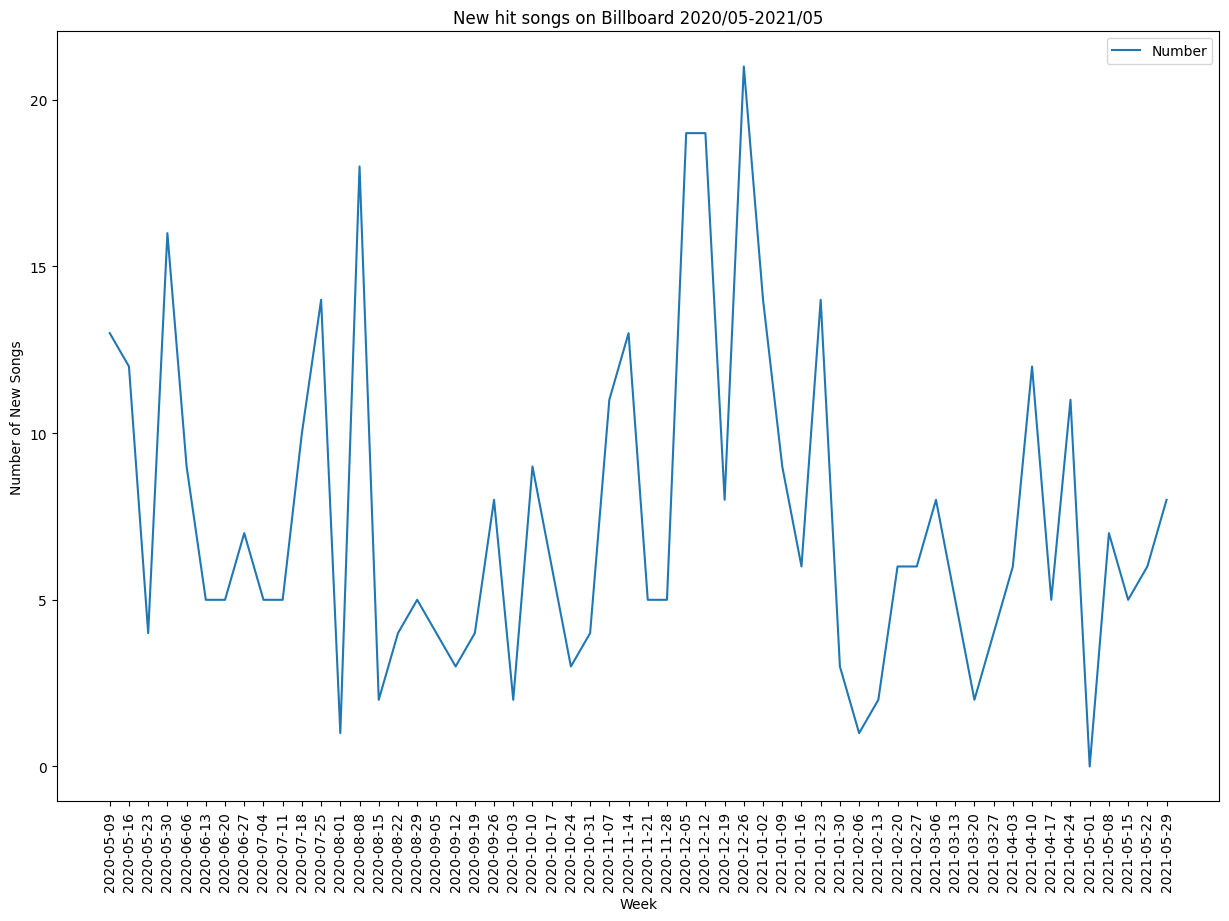

In [ ]:
# 設定大小
plt.figure(figsize=(15, 10))

# 繪製折線圖 drop last date (2021/06/05 out of period no data)
plt.plot(date_list[:-1], num_new_values[:-1], label='Number')

# set plot title and labels
plt.title('New hit songs on Billboard 2020/05-2021/05')

# 設定 x 軸和 y 軸的標籤
plt.xlabel('Week')
plt.ylabel('Number of New Songs')
plt.xticks(rotation = -270)

# 設定圖例
plt.legend()

# 顯示圖形
plt.show()

# Music attributes trends by week

## Time period data

In [ ]:
df_q5 = df_cd[(df_cd.week_id >= '2019-05-01') & (df_cd.week_id <= '2021-05-31')].dropna(subset=['liveness','spotify_track_duration_ms', 'spotify_genre'])

In [ ]:
df_q5.head(1)

,week_id,week_position,song,performer,song_id,previous_week_position,peak_position,weeks_on_chart,spotify_genre,spotify_track_duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
779,2019-06-15,67,Call You Mine,The Chainsmokers & Bebe Rexha,Call You MineThe Chainsmokers & Bebe Rexha,NaN,67,1,"['electropop', 'pop', 'tropical house']",217640.0,...,7.0,-5.59,1.0,0.0289,0.225,0.0,0.414,0.501,104.003,4.0


In [ ]:
df_q5 = df_q5[['week_id','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

In [ ]:
df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7899 entries, 779 to 281805
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   week_id           7899 non-null   datetime64[ns]
 1   danceability      7899 non-null   float64       
 2   energy            7899 non-null   float64       
 3   loudness          7899 non-null   float64       
 4   speechiness       7899 non-null   float64       
 5   acousticness      7899 non-null   float64       
 6   instrumentalness  7899 non-null   float64       
 7   liveness          7899 non-null   float64       
 8   valence           7899 non-null   float64       
 9   tempo             7899 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 678.8 KB


In [ ]:
# convert string date to datetime
start_date = datetime.strptime('2019-06-15', '%Y-%m-%d')
end_date = datetime.strptime('2021-05-31', '%Y-%m-%d')

# define string array with column names
cols = ['week_id','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

# create empty dataframe with column names
df_musicfactors_trends = pd.DataFrame(columns=cols)


while start_date <= end_date:
  # convert datetime to string date
  date = start_date.strftime('%Y-%m-%d')
  # pick one week song info
  week_song = df_q5[df_q5['week_id'] == start_date.strftime('%Y-%m-%d')]
  # calculate mean of each factors
  danceability_mean = week_song['danceability'].mean()
  energy_mean = week_song['energy'].mean()
  loudness_mean = week_song['loudness'].mean()
  speechiness_mean = week_song['speechiness'].mean()
  acousticness_mean = week_song['acousticness'].mean()
  instrumentalness_mean = week_song['instrumentalness'].mean()
  liveness_mean = week_song['liveness'].mean()
  valence_mean = week_song['valence'].mean()
  tempo_mean = week_song['tempo'].mean()
  # add 7 days
  start_date += timedelta(days=7)
  # Append weekly values into df_musicfactors_trends
  new_row = {'week_id': date, 'danceability': danceability_mean, 'energy': energy_mean, 'loudness': loudness_mean, 'speechiness': speechiness_mean,
             'acousticness': acousticness_mean, 'instrumentalness': instrumentalness_mean, 'liveness': liveness_mean,
             'valence': valence_mean, 'tempo': tempo_mean}
  df_musicfactors_trends = df_musicfactors_trends.append(new_row, ignore_index=True)

In [ ]:
df_musicfactors_trends.head()

,week_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2019-06-15,0.697989,0.643011,-5.863204,0.124212,0.220767,0.007092,0.157053,0.522581,121.212946
1,2019-06-22,0.696022,0.625634,-5.931860,0.120884,0.227558,0.007181,0.159635,0.502753,122.131161
2,2019-06-29,0.701489,0.635250,-5.753696,0.122358,0.209999,0.005392,0.160908,0.512989,121.729043
3,2019-07-06,0.711957,0.634624,-5.611075,0.118455,0.195361,0.005334,0.162990,0.512538,121.301957
4,2019-07-13,0.717903,0.635645,-5.644710,0.123918,0.205948,0.005352,0.165675,0.524656,118.794688


## Line chart

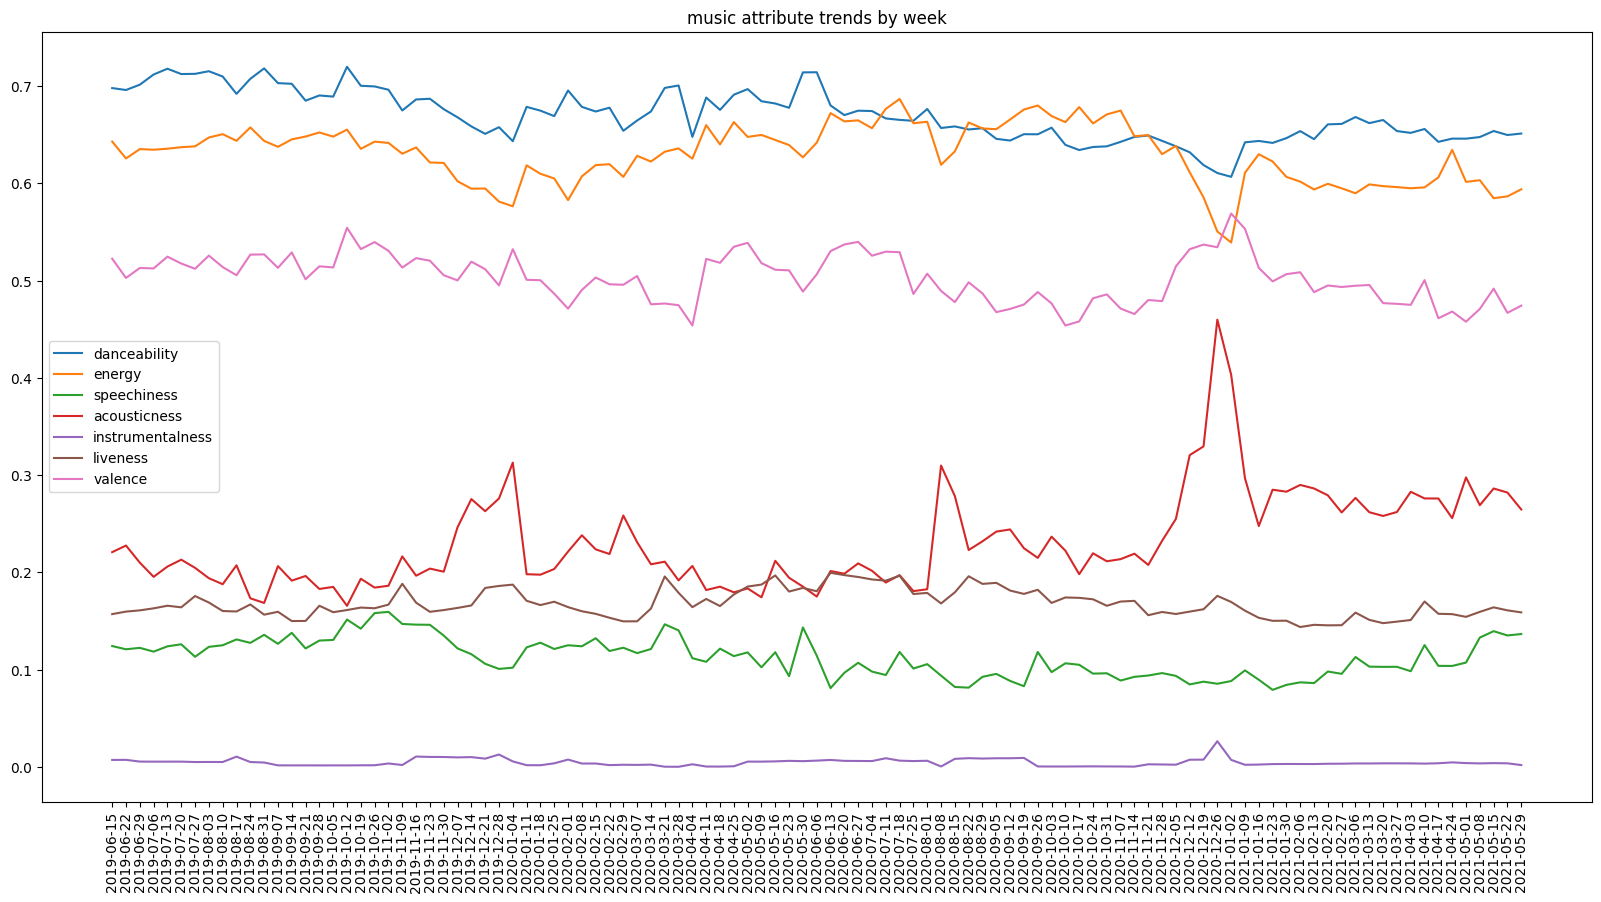

In [ ]:
plt.figure(figsize=(20, 10))
# plot the data
plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['danceability'], label='danceability')
plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['energy'], label='energy')
# plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['loudness'], label='loudness')
plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['speechiness'], label='speechiness')
plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['acousticness'], label='acousticness')
plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['instrumentalness'], label='instrumentalness')
plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['liveness'], label='liveness')
plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['valence'], label='valence')
# plt.plot(df_musicfactors_trends['week_id'], df_musicfactors_trends['tempo'], label='tempo')

# set plot title and labels
plt.title('music attribute trends by week')
# plt.xlabel('date')
# plt.ylabel('')
plt.xticks(rotation = -270)

# show legend
plt.legend()

# show plot
plt.show()

## Verify is it relate it to Christmas song

In [ ]:
qq = df_cd[(df_cd.week_id >= '2020-12-20') & (df_cd.week_id <= '2020-12-27')].dropna(subset=['liveness','spotify_track_duration_ms', 'spotify_genre'])

In [ ]:
# 尋找包含 "Christmas" 字串的行
christmas_df = qq[qq['song_id'].str.contains('Christmas')]
a1 = christmas_df['acousticness'].mean()

# 使用 str.contains() 方法尋找包含 "Christmas" 的行
christmas_mask = qq['song_id'].str.contains('Christmas')

# 使用反向遮罩（~）找出不包含 "Christmas" 的行
not_christmas_df = qq[~christmas_mask]
a2 = not_christmas_df['acousticness'].mean()

a3 = qq['acousticness'].mean()
# 顯示結果
print(a1,' ', a2, ' ', a3)

0.5033000000000001   0.45238184482758625   0.4598698088235294


In [ ]:
qq.sort_values(by=['acousticness'], ascending=False).head(5)

,week_id,week_position,song,performer,song_id,previous_week_position,peak_position,weeks_on_chart,spotify_genre,spotify_track_duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
154647,2020-12-26,100,Beautiful Trip,Kid Cudi,Beautiful TripKid Cudi,NaN,100,1,"['hip hop', 'ohio hip hop', 'rap']",37013.0,...,11.0,-15.392,0.0,0.6320,0.972,0.953000,0.882,0.420,133.971,4.0
24076,2020-12-26,21,Champagne Problems,Taylor Swift,Champagne ProblemsTaylor Swift,NaN,21,1,"['pop', 'post-teen pop']",244000.0,...,0.0,-12.077,1.0,0.0377,0.920,0.000000,0.113,0.320,171.319,4.0
170262,2020-12-26,15,The Christmas Song (Merry Christmas To You),Nat King Cole,The Christmas Song (Merry Christmas To You)Nat...,16.0,15,24,['adult standards'],192160.0,...,1.0,-15.231,1.0,0.0341,0.920,0.000081,0.138,0.209,78.696,4.0
65334,2020-12-26,11,"Let It Snow, Let It Snow, Let It Snow",Dean Martin,"Let It Snow, Let It Snow, Let It SnowDean Martin",15.0,11,12,"['adult standards', 'easy listening', 'lounge']",117146.0,...,1.0,-14.014,1.0,0.0351,0.912,0.000002,0.175,0.701,134.005,4.0
238238,2020-12-26,42,It's Beginning To Look A Lot Like Christmas,Michael Buble,It's Beginning To Look A Lot Like ChristmasMic...,33.0,33,4,"['adult standards', 'canadian pop', 'lounge']",206639.0,...,4.0,-11.042,1.0,0.0331,0.907,0.000009,0.292,0.381,93.269,3.0
